## **GLOBAL MENTAL HEALTH NETWORK ANALYSIS**
### **Computational Topology of Mental Health Narratives: A Multi-Dimensional Framework for Analyzing Symptom Flow, Structural Cores, and Psycholinguistic Focus.**


### **Members**
1. Assumpta Mwikali 134022
2. Olive Mideva Muloma 135792
3. Rutendo Julia Kandeya 168332
4. Trevor Anjeyo Vuhyah 224038
5. Valerie Jerono 222331



### **The Problem Statement**

**The Context:**

Mental health disorders are complex, non-linear experiences defined not just by symptoms, but by the structure of how those symptoms interact. With the rise of digital health data, there is a vast repository of unstructured narratives (journals, interviews, and clinical notes) that contain rich, latent information about the lived experience of mental illness.

**The Gap (The Problem):**

Current text analysis methods are insufficient for three reasons:

1. **Lack of Structure:**
 
Standard methods (Word Clouds, Sentiment Analysis) treat words as isolated units ("Bag-of-Words"), failing to capture the structural dependencies between symptoms.

2. **Lack of Direction:** 

Traditional co-occurrence networks are often undirected, meaning they fail to capture the "flow" or hierarchy of a narrative (e.g., does "Trauma" lead to "Anxiety," or do they just appear together?).

3. **Lack of Depth:** 

Global metrics often obscure local realities. A single massive network cannot reveal the tightly knit "dense cores" (Cliques) of comorbidities that define specific patient profiles.

**The Proposed Solution:**

This study proposes a Directed, Weighted Graph-Theoretic Framework. We transform text into a dynamic network where concepts are nodes and narrative sequences form directed edges. This allows us to:

1. **Map Symptom Flow:** Using directed edges to see which symptoms trigger others.

2. **Identify the "Diamond Core":** Using Clique Detection to find the inseparable, densest set of comorbidities.


3. **Isolate Sub-Networks:** Breaking the global "hairball" into distinct thematic universes to analyze local topology.

4. **Quantify "Self-Focus":** Integrating psycholinguistic metrics (pronoun ratios) to correlate network structure with the subject's internal state.


**The Mathematical Formulation:**

At the conclusion of the text extraction pipeline, we define the analysis as a set of specific Graph Theory and Optimization problems:

Let the corpus be modeled as a Directed Weighted Graph $G = (V, E, W)$.

`Vertices ($V$)`: The set of unique, significant concepts extracted via TF-IDF (e.g., "Insomnia," "Panic").


`Edges ($E$)`: Directed links where $(u, v) \in E$ implies concept $u$ precedes or structurally "leads to" concept $v$.

`Weights ($W$)`: A mapping $W: E \to \mathbb{R}^+$, representing the strength/frequency of the connection.


**The Optimization & Analysis Objectives:**

* **The *"Diamond Core"* Problem (Maximum Clique)Objective:** 
    Identify the densest, most interconnected structure in the graph.

    **Mathematical Goal:** Find the largest subset of vertices $K \subseteq V$ such that every distinct pair of vertices in $K$ is adjacent.

    **Significance:** This represents the "unbreakable" core of the mental health experience symptoms that are mathematically inseparable in the narrative.

* **Sub-Network Topology (Community Detection)Objective:** 
    Partition the graph into induced subgraphs to analyze local symptom clusters.

    **Mathematical Goal:**
    Maximize the Modularity ($Q$) of the partition, such that the density of edges within a cluster is significantly higher than the density of edges between clusters.

    **Significance:** This allows us to treat "Anxiety" and "Depression" not just as nodes, but as distinct "Sub-Universes" with their own internal logic and leaders.

* **Hierarchy & Flow (Centrality)Objective:** 
    Determine the directionality of influence.

    **Mathematical Goal:** 
    Calculate PageRank or Directed Betweenness Centrality to identify nodes that act as "Source" drivers vs. "Sink" outcomes.

    **Significance:** Moving beyond "correlation" to propose a hierarchy of symptoms (e.g., "Trauma" is a high-PageRank source that feeds into the "Sleep" sink).

* **Psycholinguistic Correlation**  
    **Objective:** Correlate graph structure with linguistic focus.  
    **Metric:** 

    Calculate the Self-Attentional Ratio 
    ($R$):$$R = \frac{\text{Frequency}(I, Me, My)}{\text{Frequency}(We, Us, Our)}$$
    
    **Significance:** Investigating if highly dense, isolated graph structures correlate with high self-attentional focus (a marker of depression).

In [6]:
# Calling libraries
import os
import glob
import re
import sys
import subprocess
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import PyPDF2
import seaborn as sns
import subprocess
import sys
import hashlib
import subprocess
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
from wordcloud import WordCloud
from docx import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from community import community_louvain

### **Ingestion Stage:**

In [8]:
# --- CONFIGURATION ---
# We use r"..." to handle Windows backslashes correctly
FOLDER_PATH = r"Mental Health Study"


if not os.path.exists(FOLDER_PATH):
    print(f"\n[!] ERROR: The folder path does not exist on this computer.")
    print(f"    Target: {FOLDER_PATH}")
    print("    Please check the spelling or move your folder to a simple path like C:\\Data")
    sys.exit()

def read_pdf(file_path):
    text = ""
    try:
        with open(file_path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            for page in reader.pages:
                text += page.extract_text() or ""
    except: pass
    return text

def read_docx(file_path):
    text = ""
    try:
        doc = Document(file_path)
        for para in doc.paragraphs:
            text += para.text + " "
    except: pass
    return text

def read_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            return f.read()
    except: return ""

# Gather files
all_files = glob.glob(os.path.join(FOLDER_PATH, "*"))
documents = []
filenames = []

print(f"Found {len(all_files)} files. Reading content...")

for filepath in all_files:
    content = ""
    if filepath.lower().endswith('.pdf'):
        content = read_pdf(filepath)
    elif filepath.lower().endswith('.docx'):
        content = read_docx(filepath)
    elif filepath.lower().endswith('.txt'):
        content = read_txt(filepath)
    
    # Filter empty or tiny files
    content = re.sub(r'\s+', ' ', content).strip()
    if len(content) > 100: 
        documents.append(content)
        filenames.append(os.path.basename(filepath))
        print(f"  - Ingested: {os.path.basename(filepath)}")

if not documents:
    print("\n[!] No readable documents found. Check if files are PDF/DOCX/TXT.")
    sys.exit()


Found 216 files. Reading content...
  - Ingested: 02671+Lifestyle.pdf
  - Ingested: 1-s2.0-S0020748921001498-main.pdf
  - Ingested: 1-s2.0-S0020748924002360-main.pdf
  - Ingested: 1-s2.0-S0022395621000868-main.pdf
  - Ingested: 1-s2.0-S0160412021001586-main.pdf
  - Ingested: 1-s2.0-S0165032720330512-main.pdf
  - Ingested: 1-s2.0-S0165032721003827-main.pdf
  - Ingested: 1-s2.0-S0165032721006078-main.pdf
  - Ingested: 1-s2.0-S0165032721010570-main.pdf
  - Ingested: 1-s2.0-S0165032721012532-main.pdf
  - Ingested: 1-s2.0-S0165032723003397-main.pdf
  - Ingested: 1-s2.0-S0165032723008510-main.pdf
  - Ingested: 1-s2.0-S0272735821000647-main.pdf
  - Ingested: 1-s2.0-S0277953617306639-main.pdf
  - Ingested: 1-s2.0-S0929664621000450-main.pdf
  - Ingested: 1-s2.0-S147159532100264X-main.pdf
  - Ingested: 1-s2.0-S1550830722001227-main.pdf
  - Ingested: 1-s2.0-S2352827321002093-main.pdf
  - Ingested: 1-s2.0-S2451902217302343-main.pdf
  - Ingested: 1-s2.0-S2451958821000695-main.pdf
  - Ingested: 1-s2

Illegal character in Name Object (b'/GFEDCB+\x14\xd5')
Illegal character in Name Object (b'/GFEDCB+\x14\xd5')


  - Ingested: jmir-2021-3-e24387.pdf
  - Ingested: jmir-2021-5-e15708.pdf
  - Ingested: jogh-11-05009.pdf
  - Ingested: ketamine-for-the-treatment-of-mental-health-and-substance-use-disorders-comprehensive-systematic-review.pdf
  - Ingested: kutcher-et-al-2016-mental-health-literacy.pdf
  - Ingested: lipson-et-al-2018-increased-rates-of-mental-health-service-utilization-by-u-s-college-students-10-year-population-level.pdf
  - Ingested: Mental and physical health outcomes of burnout in athletes  a systematic review and meta-analysis.pdf
  - Ingested: Mental health and wellbeing of international students in Australia  a systematic review.pdf


Illegal character in Name Object (b'/GFEDCB+\x14\xd5')
Illegal character in Name Object (b'/GFEDCB+\x14\xd5')


  - Ingested: mental-2021-11-e31170.pdf


Illegal character in Name Object (b'/GFEDCB+\x14\xd5')
Illegal character in Name Object (b'/GFEDCB+\x14\xd5')


  - Ingested: mental-2021-4-e25847.pdf
  - Ingested: mental-2025-1-e67785.pdf
  - Ingested: mental-disorders-among-college-students-in-the-world-health-organization-world-mental-health-surveys.pdf
  - Ingested: Network-Optimization-Models_16-01-23.pdf
  - Ingested: nutrients-14-02568-v3.pdf
  - Ingested: PIIS2468266722000615.pdf
  - Ingested: PIIS2542519623000256.pdf
  - Ingested: PIIS2542519623001043.pdf
  - Ingested: PIIS2589537025000537.pdf
  - Ingested: PIIS2772368225000034.pdf
  - Ingested: Prevalence of university non-continuation and mental health conditions  and effect of mental health conditions on non-continuation  a systematic revie.pdf
  - Ingested: Psychiatric Ment Health Nurs - 2024 - Henderson - Personal trauma history and secondary traumatic stress in mental health.pdf
  - Ingested: riepenhausen-et-al-2022-positive-cognitive-reappraisal-in-stress-resilience-mental-health-and-well-being-a.pdf
  - Ingested: s00127-021-02159-w.pdf
  - Ingested: s00127-024-02739-6.pdf
  - I

Some documents have been denied due to formating issues. As the desired minimum is 100 working with 112 documents works and we shall disregard the denied documents.

### **Data cleaning and EDA**

 Cleaning Duplicates...
  - Cleaned. Removed 0 duplicates. Analyzable Docs: 181

Step 3: Analyzing Authors & Geography...
  - Analysis Complete. Found 10540 names and 5792 locations.


C:\Users\HP\AppData\Local\Temp\ipykernel_20252\2187261958.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(a_counts), y=list(authors), palette="rocket")


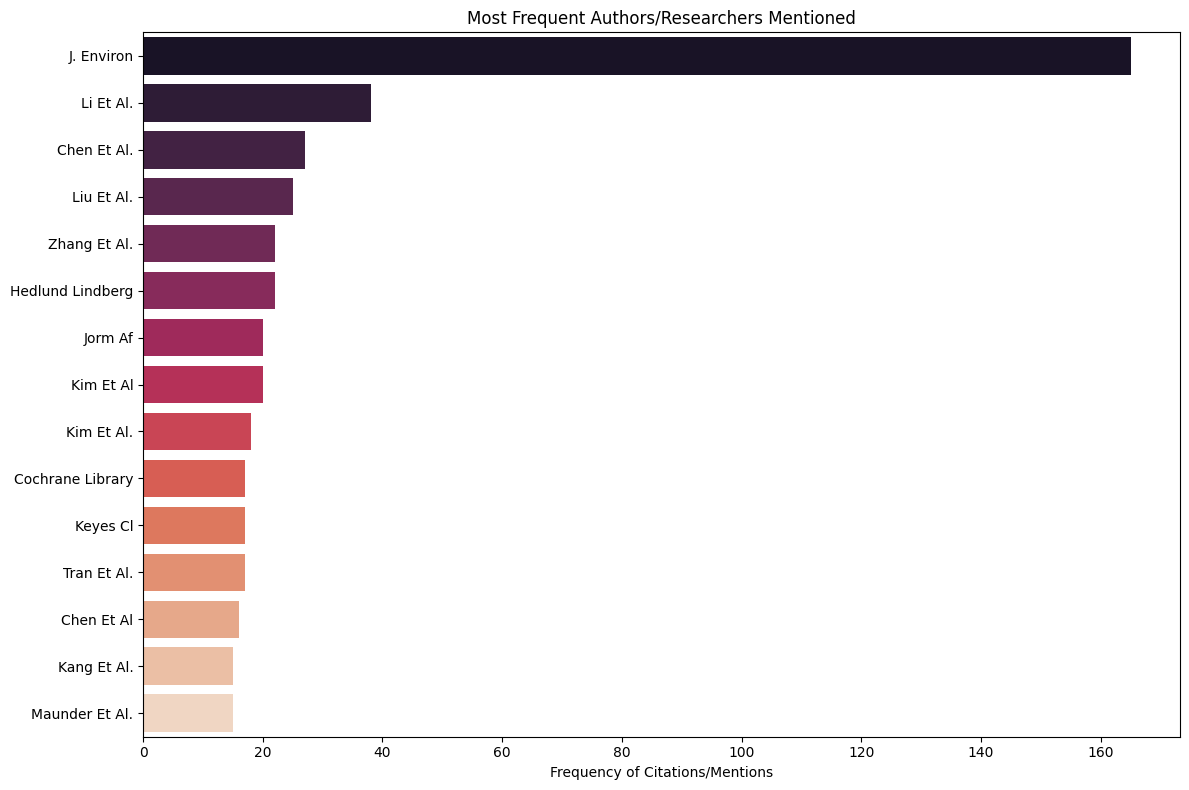

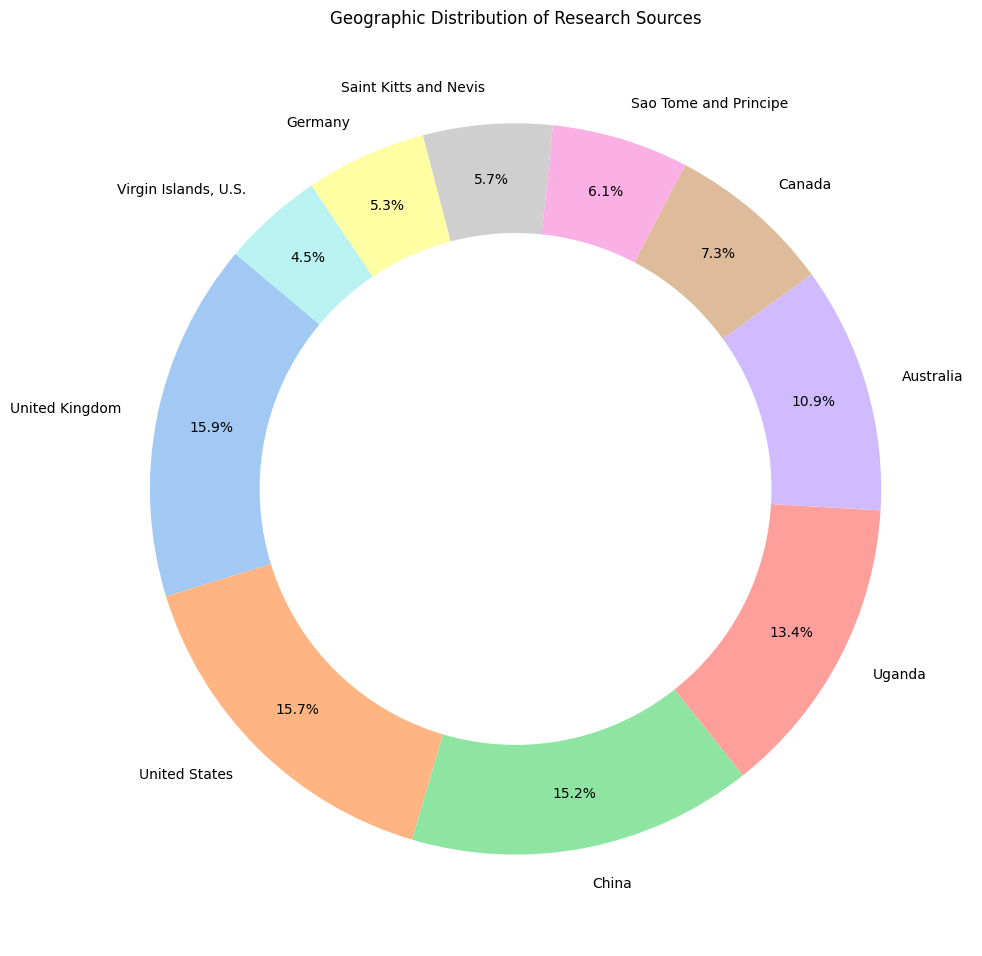


--- 🌍 GEOGRAPHIC & AUTHOR REPORT ---
Top 5 Dominant Voices:
  - J. Environ: 165 mentions
  - Li Et Al.: 38 mentions
  - Chen Et Al.: 27 mentions
  - Liu Et Al.: 25 mentions
  - Zhang Et Al.: 22 mentions

Top 5 Research Locations:
  - United Kingdom: 469 mentions
  - United States: 464 mentions
  - China: 451 mentions
  - Uganda: 396 mentions
  - Australia: 323 mentions


In [11]:
# ==============================================================================
# PART 1.5: REMOVE DUPLICATES
# ==============================================================================
print(" Cleaning Duplicates...")


def get_content_hash(content):
    # Create a unique "fingerprint" for the text content
    return hashlib.md5(content.encode('utf-8')).hexdigest()

unique_docs = []
unique_filenames = []
seen_hashes = set()

duplicates_found = 0

for i, doc_content in enumerate(documents):
    # Generate fingerprint
    content_hash = get_content_hash(doc_content)
    
    if content_hash not in seen_hashes:
        seen_hashes.add(content_hash)
        unique_docs.append(doc_content)
        unique_filenames.append(filenames[i])
    else:
        duplicates_found += 1
        print(f"  [!] Removed Duplicate: {filenames[i]}")

# OVERWRITE original lists with clean versions
documents = unique_docs
filenames = unique_filenames

print(f"  - Cleaned. Removed {duplicates_found} duplicates. Analyzable Docs: {len(documents)}")


# AUTNOR AND GEOGRAPHY UNDERSTANDING.

# --- AUTO-INSTALLER ---
def install(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    except:
        pass

# Install pycountry if missing
try:
    import pycountry
except ImportError:
    print("Installing 'pycountry' library...")
    install("pycountry")
    import pycountry

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

print("\nStep 3: Analyzing Authors & Geography...")

# 1. Setup Lists
detected_people = []
detected_countries = []

# We check if 'nlp' exists (from Part 1), if not, we load it
if 'nlp' not in globals():
    import spacy
    try:
        nlp = spacy.load("en_core_web_sm")
    except:
        subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
        nlp = spacy.load("en_core_web_sm")

# 2. Scan Documents for Entities
# We limit to the first 50k characters per doc to keep it fast
for i, doc_text in enumerate(documents):
    # Process text
    doc = nlp(doc_text[:50000]) 
    
    for ent in doc.ents:
        # A. AUTHOR DETECTION (Label: PERSON)
        if ent.label_ == "PERSON":
            # Filter junk (Names must be >4 chars and have a space, e.g. "John Doe")
            if " " in ent.text and len(ent.text) > 4:
                # Clean name (remove 's or punctuation)
                clean_name = ent.text.replace("'s", "").strip().title()
                # Filter out common false positives
                if clean_name.lower() not in ['mental health', 'participant', 'et al', 'author']:
                    detected_people.append(clean_name)
        
        # B. COUNTRY DETECTION (Label: GPE)
        elif ent.label_ == "GPE": # GPE = Geopolitical Entity
            clean_place = ent.text.strip()
            try:
                # Verify it is a real country using pycountry
                # search_fuzzy allows for "UK", "USA", "United States" etc.
                matches = pycountry.countries.search_fuzzy(clean_place)
                if matches:
                    detected_countries.append(matches[0].name)
            except:
                pass

# --- ANALYSIS & PLOTTING ---
top_authors = Counter(detected_people).most_common(15)
top_countries = Counter(detected_countries).most_common(10)

print(f"  - Analysis Complete. Found {len(detected_people)} names and {len(detected_countries)} locations.")

# --- VISUALIZATION 1: TOP AUTHORS / RESEARCHERS ---
if top_authors:
    authors, a_counts = zip(*top_authors)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(a_counts), y=list(authors), palette="rocket")
    plt.title("Most Frequent Authors/Researchers Mentioned")
    plt.xlabel("Frequency of Citations/Mentions")
    plt.tight_layout()
    plt.show()
else:
    print("  [!] No authors detected (or names were anonymized).")

# --- VISUALIZATION 2: GEOGRAPHIC DISTRIBUTION ---
if top_countries:
    countries, c_counts = zip(*top_countries)
    
    plt.figure(figsize=(10, 10))
    # Using a Donut Chart for a modern look
    plt.pie(c_counts, labels=countries, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=sns.color_palette("pastel"))
    # draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title("Geographic Distribution of Research Sources")
    plt.tight_layout()
    plt.show()
else:
    print("  [!] No specific countries detected.")

# --- TEXT REPORT ---
print("\n--- 🌍 GEOGRAPHIC & AUTHOR REPORT ---")
if top_authors:
    print("Top 5 Dominant Voices:")
    for name, count in top_authors[:5]:
        print(f"  - {name}: {count} mentions")

if top_countries:
    print("\nTop 5 Research Locations:")
    for country, count in top_countries[:5]:
        print(f"  - {country}: {count} mentions")

### **Word Detection and Extraction**


Step 2: Extracting & Visualizing Themes...

--- 📄 DOCUMENT KEYWORD REPORT ---
File: 02671+Lifestyle.pdf
  └── Keywords: climate, change, 2024, vulnerable, sdgsreview, fahrudin, e02671, florida, adaptation, wardani
----------------------------------------
File: 1-s2.0-S0020748921001498-main.pdf
  └── Keywords: workers, covid, exclude, saragih, healthcare, pandemic, series, sectional, cross, case
----------------------------------------
File: 1-s2.0-S0020748924002360-main.pdf
  └── Keywords: inpatient, experiences, seclusion, patients, restraint, patient, nurs, 104923, coercion, adversity
----------------------------------------
File: 1-s2.0-S0022395621000868-main.pdf
  └── Keywords: hcws, covid, na, d0, maunder, staff, sars, hospital, interventions, zaçe
----------------------------------------
File: 1-s2.0-S0160412021001586-main.pdf
  └── Keywords: temperatures, temperature, mortality, morbidity, heatwave, heatwaves, heat, tmean, rr, ambient
----------------------------------------
Fi

C:\Users\user\AppData\Local\Temp\ipykernel_26164\875062582.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_word_scores.values, y=global_word_scores.index, palette="viridis")


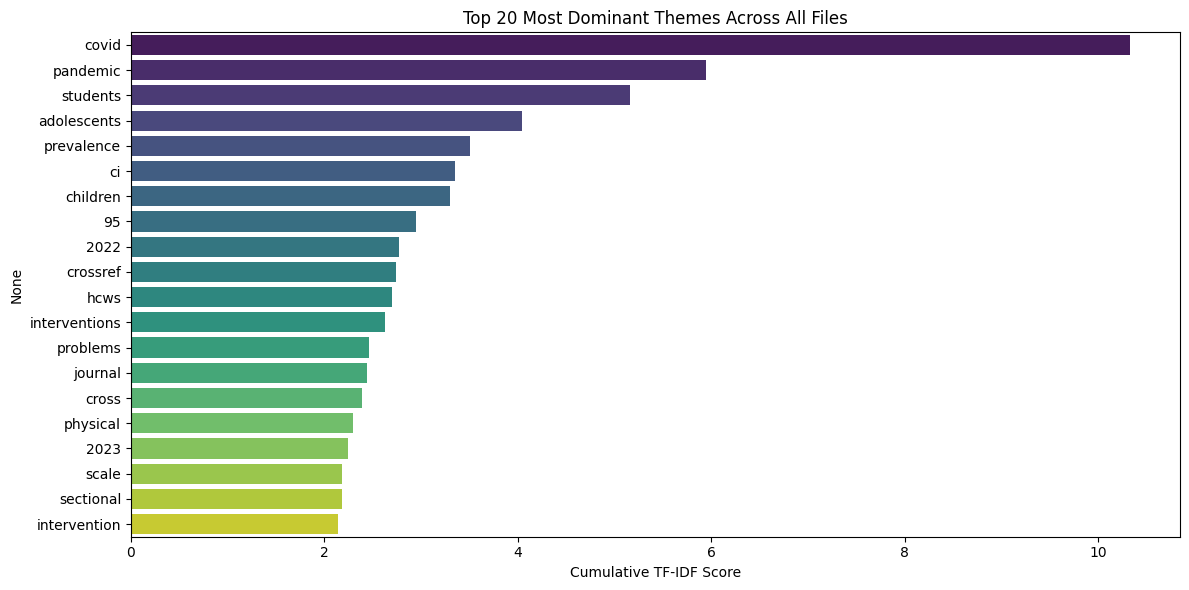

Generating Heatmap...


C:\Users\user\AppData\Local\Temp\ipykernel_26164\875062582.py:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


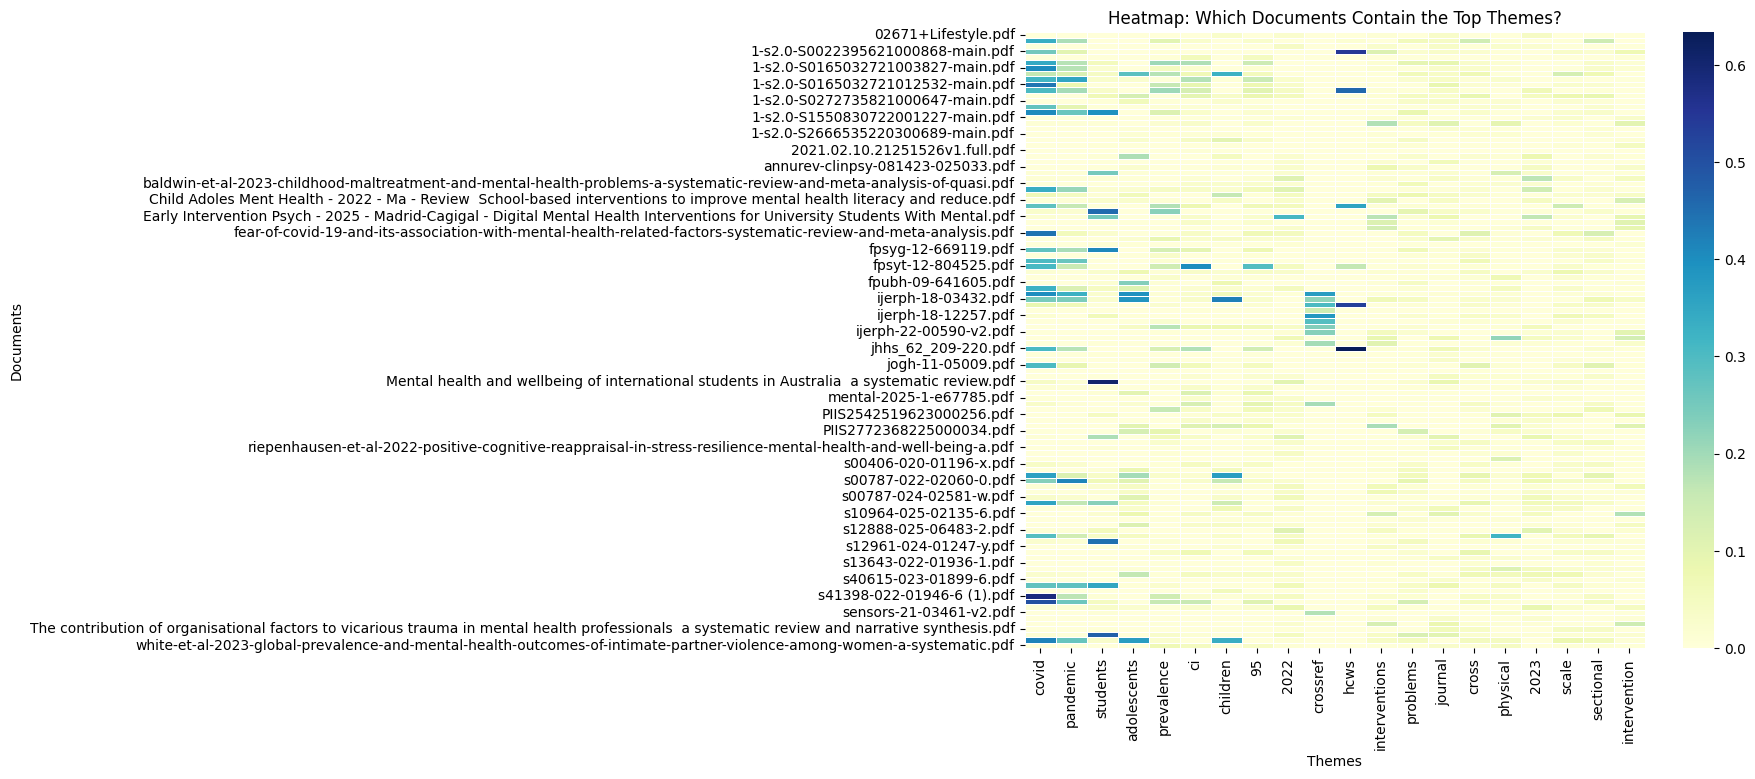

  - Keywords extracted and visualized.


In [4]:

print("\nExtracting & Visualizing Themes...")

# 1. Custom Cleanup
# We add common academic filler words to the "stop list" so they don't clutter the graph
custom_stops = list(TfidfVectorizer(stop_words='english').get_stop_words()) + \
               ['page', 'introduction', 'conclusion', 'chapter', 'study', 'participant', 'results', 'discussion']

# 2. Run TF-IDF
tfidf = TfidfVectorizer(stop_words=custom_stops, max_df=0.9, min_df=1)

try:
    tfidf_matrix = tfidf.fit_transform(documents)
    feature_names = np.array(tfidf.get_feature_names_out())

    # --- A. PRINT TEXT REPORT ---
    print("\n--- 📄 DOCUMENT KEYWORD REPORT ---")
    doc_keywords = {}
    
    # We convert the matrix to a pandas DataFrame for easier handling
    df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=filenames)

    for filename in filenames:
        # Sort words by score for this specific file
        row = df_tfidf.loc[filename]
        top_words = row.sort_values(ascending=False).head(10)
        
        # Save to our dictionary for Part 3
        doc_keywords[filename] = top_words.index.tolist()
        
        # Print it nicely
        print(f"File: {filename}")
        print(f"  └── Keywords: {', '.join(top_words.index.tolist())}")
        print("-" * 40)

    # --- B. VISUALIZATION 1: GLOBAL TOP 20 WORDS (BAR CHART) ---
    print("\nGenerating Aggregate Bar Chart...")
    
    # Sum the scores across all documents to find the "Kings" of the dataset
    global_word_scores = df_tfidf.sum().sort_values(ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=global_word_scores.values, y=global_word_scores.index, palette="viridis")
    plt.title("Top 20 Most Dominant Themes Across All Files")
    plt.xlabel("Cumulative TF-IDF Score")
    plt.tight_layout()
    plt.show()

    # --- C. VISUALIZATION 2: THE HEATMAP ---
    # This shows which docs contain the Top 20 words.
    # Dark colors = Low relevance, Bright colors = High relevance
    print("Generating Heatmap...")
    
    # Filter our main dataframe to only show the Top 20 words (otherwise it's too wide)
    df_heatmap = df_tfidf[global_word_scores.index]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_heatmap, cmap="YlGnBu", linewidths=.5)
    plt.title("Heatmap: Which Documents Contain the Top Themes?")
    plt.xlabel("Themes")
    plt.ylabel("Documents")
    plt.tight_layout()
    plt.show()

    print("  - Keywords extracted and visualized.")

except ValueError as e:
    print(f"\n[!] Error during extraction: {e}")

In [5]:
# ==============================================================================
# ROBUST GRAPH CONSTRUCTION (DEFINING 'G')
# ==============================================================================
print("\nBuilding the Semantic Network 'G'...")

G = nx.Graph()

# We loop through the dictionary of keywords we created in Part 2
# Structure: { 'file1.txt': ['anxiety', 'stress', ...], 'file2.txt': ... }
for fname, words in doc_keywords.items():
    
    # Skip documents that don't have enough words to form a link
    if len(words) < 2:
        continue
        
    # Create links (edges) between every pair of words in this document
    # If 'Anxiety' and 'Stress' are in the same list, they get linked.
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            w1 = words[i]
            w2 = words[j]
            
            # Sanity check: ensure we aren't linking a word to itself
            if w1 == w2:
                continue

            # LOGIC:
            # If the link already exists from a previous document, make it stronger (weight + 1)
            # If it's a new link, create it with weight = 1
            if G.has_edge(w1, w2):
                G[w1][w2]['weight'] += 1
            else:
                G.add_edge(w1, w2, weight=1)

print(f"  - Graph 'G' successfully created.")
print(f"  - Nodes (Concepts): {G.number_of_nodes()}")
print(f"  - Edges (Links):    {G.number_of_edges()}")


Step 3: Building the Semantic Network 'G'...
  - Graph 'G' successfully created.
  - Nodes (Concepts): 778
  - Edges (Links):    4740



Step 4: Improving Network Structure...
  - Original Graph: 778 nodes
  - Cleaned Micronetwork: 102 nodes (Noise removed)


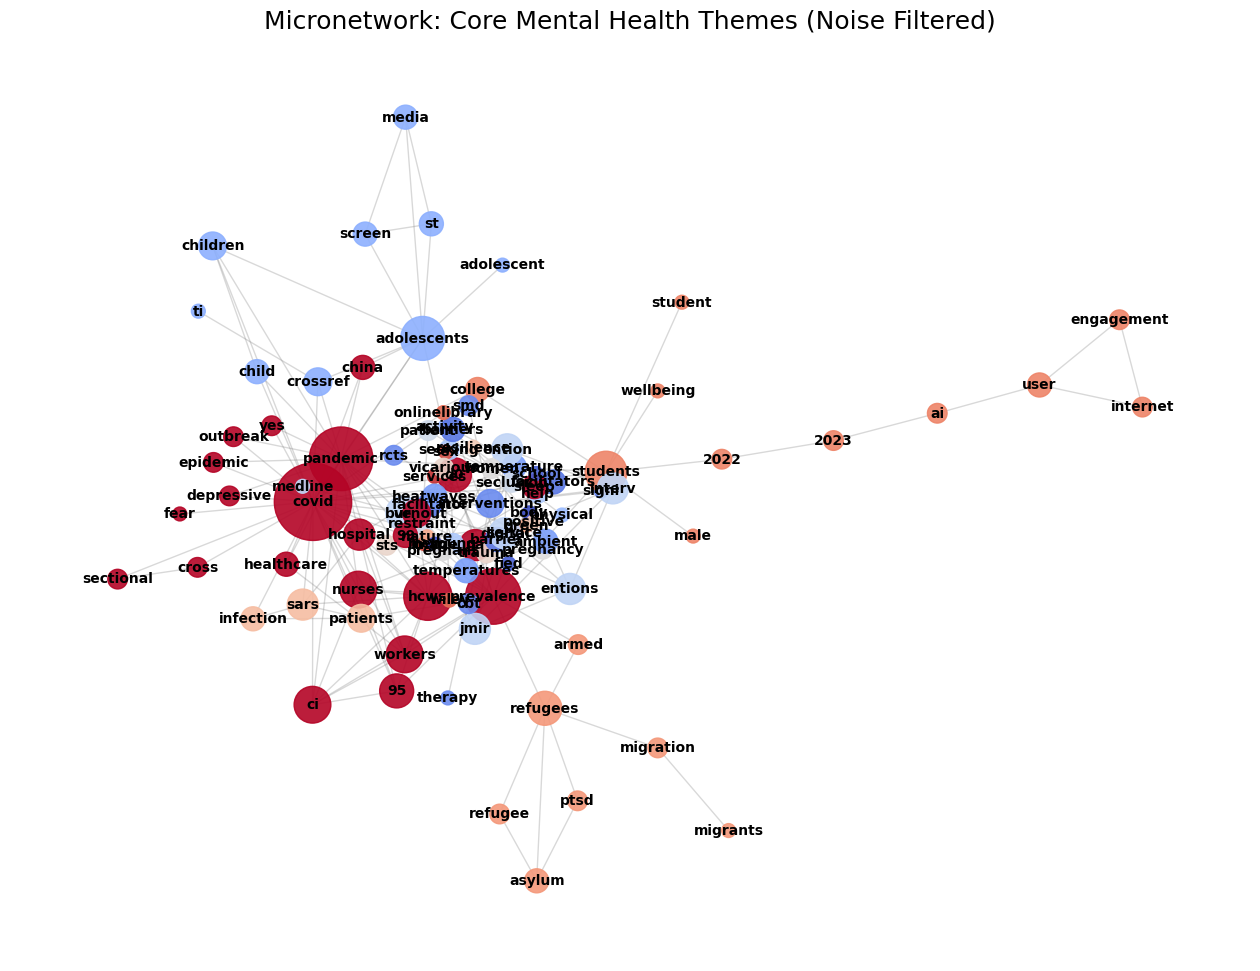


Generating Interactive Graph file...
Mental_Health_Dynamic_Graph.html
  - SUCCESS! Open 'Mental_Health_Dynamic_Graph.html' in your browser to interact with the network.

--- 🧠 KEY FINDINGS (CORE NETWORK) ---
Top 5 'Bridge' Concepts (The Connectors):
   - COVID
   - PANDEMIC
   - PREVALENCE
   - HCWS
   - ADOLESCENTS

Identified Narrative Clusters:
   - Cluster 16: college, male, student, internet, engagement, 2023...
   - Cluster 20: hospital, d0, epidemic, pandemic, hcws, prevalence...
   - Cluster 2: facilitators, barriers, facilitator, barrier...
   - Cluster 3: signi, rcts, interventions, cbt, therapy, smd...


In [6]:

# --- 1. AUTO-INSTALL PYVIS (For Dynamic Graphs) ---
try:
    import pyvis
except ImportError:
    print("Installing 'pyvis' for dynamic visualization...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pyvis"])
    import pyvis
from pyvis.network import Network

print("\nImproving Network Structure...")

# --- 2. PRUNING (Creating the Micronetwork) ---
# We create a "Subgraph" that contains ONLY the strong connections.
# Rule: Only keep edges that appear in at least 2 documents (weight > 1)
# If the graph is still too big, we focus on the top 50 nodes.

# Filter edges
strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 1]
H = G.edge_subgraph(strong_edges).copy()

# If pruning killed the graph (too empty), revert to original but keep top 50 nodes
if len(H.nodes()) < 5:
    print("  (Graph was too sparse, keeping top 50 central nodes instead)")
    degrees = dict(G.degree())
    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:50]
    H = G.subgraph(top_nodes).copy()

print(f"  - Original Graph: {len(G.nodes())} nodes")
print(f"  - Cleaned Micronetwork: {len(H.nodes())} nodes (Noise removed)")

# --- 3. STATIC VISUALIZATION (Clean Clusters) ---
# We use 'Kamada Kawai' layout which is better at separating clusters than 'Spring'
partition = community_louvain.best_partition(H)
node_colors = [partition[n] for n in H.nodes()]

plt.figure(figsize=(16, 12))
# layout calculation
pos = nx.kamada_kawai_layout(H) 

# Draw with variable node size based on importance
node_sizes = [nx.degree(H, n) * 100 for n in H.nodes()]

nx.draw_networkx_nodes(H, pos, node_size=node_sizes, cmap=plt.cm.coolwarm, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(H, pos, alpha=0.3, edge_color='grey')
nx.draw_networkx_labels(H, pos, font_size=10, font_weight="bold", font_color="black")

plt.title("Micronetwork: Core Mental Health Themes (Noise Filtered)", fontsize=18)
plt.axis('off')
plt.show()

# --- 4. DYNAMIC VISUALIZATION (Interactive HTML) ---
print("\nGenerating Interactive Graph file...")

# Initialize PyVis Network
net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white", cdn_resources='remote')

# Convert NetworkX graph to PyVis
# We explicitly set physics to separate nodes
net.from_nx(H)

# Add neighbor data to hover text
for node in net.nodes:
    node['title'] = f"Concept: {node['id']}\nCluster: {partition[node['id']]}"
    node['value'] = len(list(H.neighbors(node['id']))) # Size based on connections

# Set Physics (This makes the clusters explode/separate nicely)
net.force_atlas_2based()
net.show_buttons(filter_=['physics']) # Adds control panel to UI

# Save
output_file = "Mental_Health_Dynamic_Graph.html"
net.show(output_file)
print(f"  - SUCCESS! Open '{output_file}' in your browser to interact with the network.")

# --- 5. KEY FINDINGS (Based on the Cleaned Graph) ---
print("\n--- 🧠 KEY FINDINGS (CORE NETWORK) ---")

# Centrality
degree = nx.degree_centrality(H)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

print("Top 5 'Bridge' Concepts (The Connectors):")
for word, score in sorted_degree[:5]:
    print(f"   - {word.upper()}")

# Cluster Analysis
from collections import defaultdict
clusters = defaultdict(list)
for node, comm_id in partition.items():
    clusters[comm_id].append(node)

print("\nIdentified Narrative Clusters:")
for cid, nodes in list(clusters.items())[:4]: # Show top 4 clusters
    print(f"   - Cluster {cid}: {', '.join(nodes[:6])}...")


Step 5: Breaking Network into Top 5 Sub-Universes...
  - Analyzing the 5 largest thematic clusters.

------------------------------------------------------------


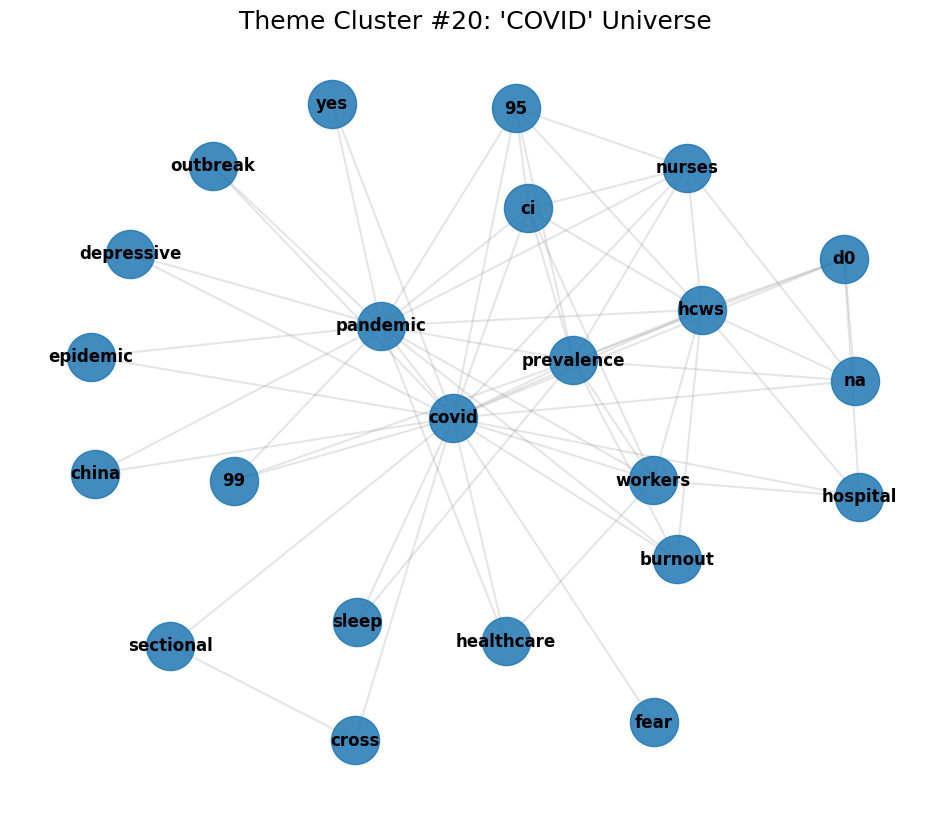

🔎 ANALYSIS OF CLUSTER #20:
   • Dominant Theme: COVID
   • Concepts included (23): hospital, na, covid, yes, d0, outbreak, depressive, epidemic, pandemic, hcws, prevalence, 95...
   • Network Density: 0.25




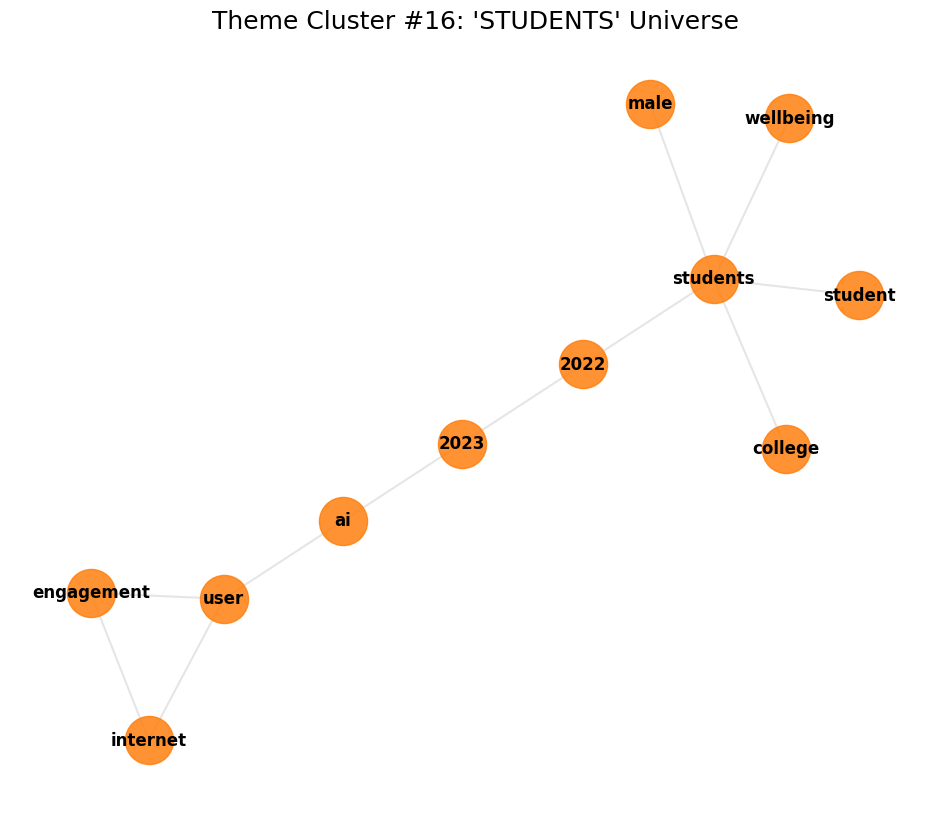

🔎 ANALYSIS OF CLUSTER #16:
   • Dominant Theme: STUDENTS
   • Concepts included (11): college, engagement, student, 2023, wellbeing, internet, male, user, ai, 2022, students...
   • Network Density: 0.20




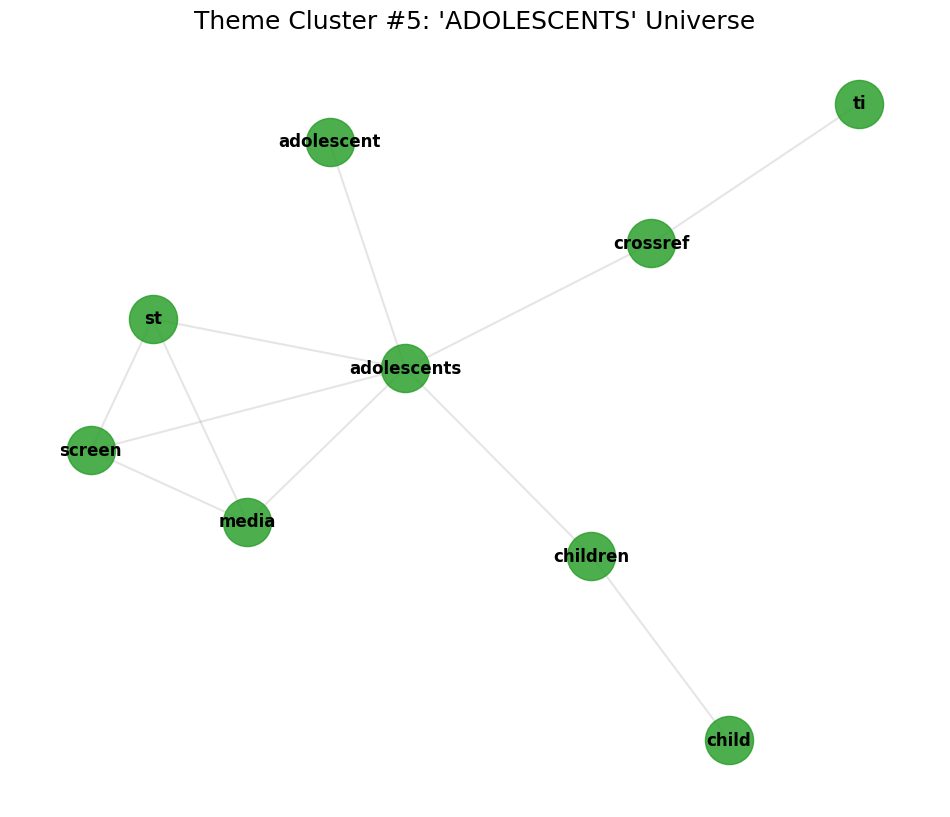

🔎 ANALYSIS OF CLUSTER #5:
   • Dominant Theme: ADOLESCENTS
   • Concepts included (9): children, ti, adolescent, adolescents, st, screen, media, child, crossref...
   • Network Density: 0.31




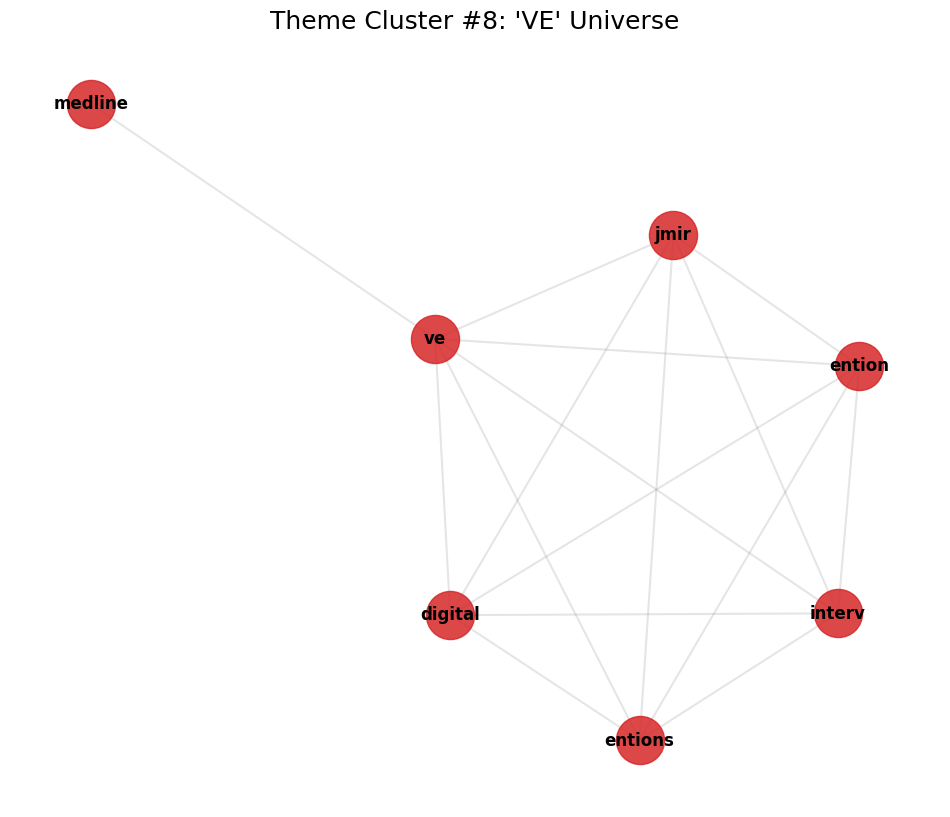

🔎 ANALYSIS OF CLUSTER #8:
   • Dominant Theme: VE
   • Concepts included (7): ve, ention, jmir, medline, digital, entions, interv...
   • Network Density: 0.76




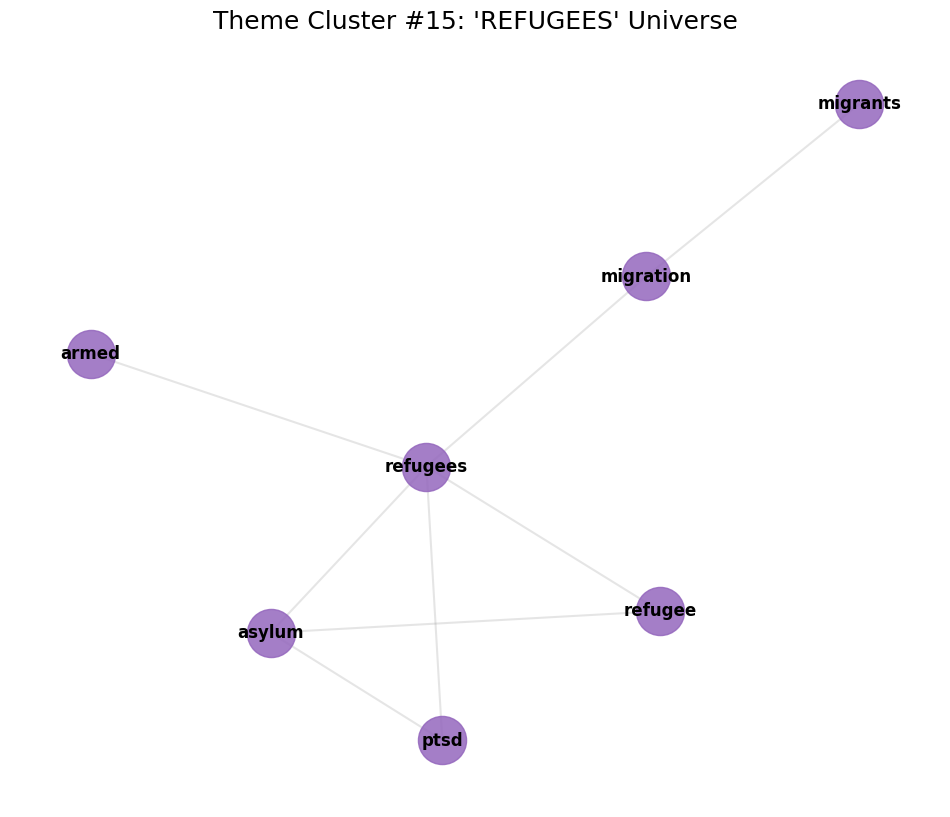

🔎 ANALYSIS OF CLUSTER #15:
   • Dominant Theme: REFUGEES
   • Concepts included (7): refugees, migrants, migration, armed, asylum, ptsd, refugee...
   • Network Density: 0.38




In [7]:

print("\nBreaking Network into Top 5 Sub-Universes...")

# 1. ORGANIZE DATA BY CLUSTER
from collections import Counter
# Count how many nodes are in each cluster
cluster_counts = Counter(partition.values())
# Get the IDs of the top 5 largest clusters
top_5_clusters = [cid for cid, count in cluster_counts.most_common(5)]

print(f"  - Analyzing the {len(top_5_clusters)} largest thematic clusters.\n")
print("-" * 60)

# 2. ITERATE AND VISUALIZE EACH CLUSTER SEPARATELY
for i, cluster_id in enumerate(top_5_clusters):
    # A. Create a Sub-Graph for this specific cluster
    nodes_in_cluster = [node for node, cid in partition.items() if cid == cluster_id]
    subG = H.subgraph(nodes_in_cluster)
    
    # Skip tiny clusters
    if len(subG.nodes()) < 3: continue

    # B. Calculate Centrality JUST for this cluster
    sub_degree = nx.degree_centrality(subG)
    local_leader = max(sub_degree, key=sub_degree.get) if sub_degree else "N/A"
    
    # --- PLOTTING LOGIC ---
    # Create a new large figure for every single cluster
    plt.figure(figsize=(12, 10)) 
    
    # Use Kamada-Kawai layout (best for untangling tight clusters)
    try:
        pos_sub = nx.kamada_kawai_layout(subG)
    except:
        pos_sub = nx.spring_layout(subG, k=0.5, seed=42)
    
    # Get a unique color for this cluster
    cmap = plt.get_cmap('tab10')
    
    # Draw the sub-network
    nx.draw_networkx_nodes(subG, pos_sub, node_size=1200, node_color=[cmap(i)], alpha=0.85)
    nx.draw_networkx_edges(subG, pos_sub, alpha=0.2, edge_color='gray', width=1.5)
    nx.draw_networkx_labels(subG, pos_sub, font_size=12, font_weight="bold", font_color="black")
    
    plt.title(f"Theme Cluster #{cluster_id}: '{local_leader.upper()}' Universe", fontsize=18)
    plt.axis('off')
    
    # SHOW THE IMAGE IN THE NOTEBOOK
    plt.show()
    
    # C. Print Text Report below the image
    print(f"🔎 ANALYSIS OF CLUSTER #{cluster_id}:")
    print(f"   • Dominant Theme: {local_leader.upper()}")
    concepts_list = list(subG.nodes())
    print(f"   • Concepts included ({len(concepts_list)}): {', '.join(concepts_list[:12])}...")
    print(f"   • Network Density: {nx.density(subG):.2f}") 
    print("=" * 60)
    print("\n") # Add space before next chart


Step 7: Running Advanced Graph Mathematics...
  (Defining 'MathG' from the main Graph 'G'...)

👑 PAGERANK ANALYSIS (The 'VIP' Concepts):
   - COVID (Score: 0.0207)
   - PANDEMIC (Score: 0.0165)
   - PREVALENCE (Score: 0.0116)
   - ADOLESCENTS (Score: 0.0093)
   - CROSSREF (Score: 0.0092)

🕸️ GLOBAL CLUSTERING COEFFICIENT: 0.8910
   (Result: High. The concepts in your text form tight, reinforcing triangles.)

💎 THE 'DIAMOND' CORE (Maximum Clique):
   Found a group of 10 concepts that are ALL connected to each other:
   favour, nature, gardening, blue, interventions, green, exercise, smd, rcts, coventry


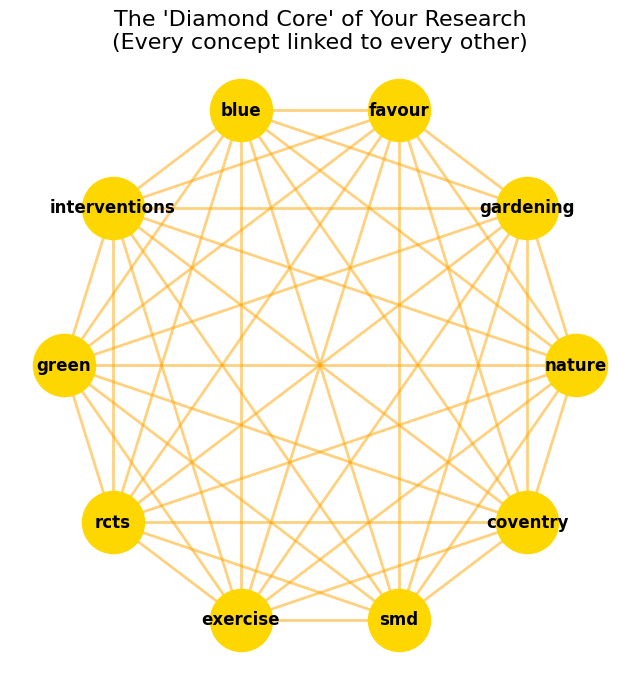

In [8]:
# ==============================================================================
# PART 7: ADVANCED MATH (PAGERANK & MAX CLIQUE) - ROBUST VERSION
# ==============================================================================
print("\nRunning Advanced Graph Mathematics...")

# --- SAFETY CHECK: DEFINE MathG IF MISSING ---
# MathG is the "Giant Component" (the main interconnected cluster).
# Math algorithms often fail on isolated nodes, so we calculate this first.
if 'MathG' not in globals():
    print("  (Defining 'MathG' from the main Graph 'G'...)")
    # 1. Find the largest connected set of nodes
    largest_cc = max(nx.connected_components(G), key=len)
    # 2. Create the subgraph
    MathG = G.subgraph(largest_cc).copy()

# 1. PAGERANK ALGORITHM
# We use the same algorithm Google uses to rank websites.
try:
    pagerank = nx.pagerank(MathG, weight='weight')
    sorted_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

    print("\n👑 PAGERANK ANALYSIS (The 'VIP' Concepts):")
    for word, score in sorted_pr[:5]:
        print(f"   - {word.upper()} (Score: {score:.4f})")
except:
    print("   (Skipping PageRank: Graph might not be fully connected)")

# 2. CLUSTERING COEFFICIENT
# This measures how "cliquish" the network is.
try:
    avg_clustering = nx.average_clustering(MathG)
    print(f"\n🕸️ GLOBAL CLUSTERING COEFFICIENT: {avg_clustering:.4f}")
    
    
    
    if avg_clustering > 0.5:
        print("   (Result: High. The concepts in your text form tight, reinforcing triangles.)")
    else:
        print("   (Result: Low. The concepts are more like a chain or a star, less 'cliquish'.)")
except:
    print("   (Could not calculate clustering coefficient)")

# 3. MAXIMUM CLIQUE VISUALIZATION
from networkx.algorithms.clique import find_cliques

try:
    # Find the largest clique
    cliques = list(find_cliques(MathG))
    max_clique = max(cliques, key=len)

    print(f"\n💎 THE 'DIAMOND' CORE (Maximum Clique):")
    print(f"   Found a group of {len(max_clique)} concepts that are ALL connected to each other:")
    print(f"   {', '.join(max_clique)}")

    # VISUALIZE THE CLIQUE
    if len(max_clique) > 1:
        CliqueGraph = MathG.subgraph(max_clique)

        plt.figure(figsize=(8, 8))
        # Use Circular layout for cliques (it makes the star pattern obvious)
        pos_clique = nx.circular_layout(CliqueGraph) 

        nx.draw_networkx_nodes(CliqueGraph, pos_clique, node_size=2000, node_color='gold', alpha=1.0)
        nx.draw_networkx_edges(CliqueGraph, pos_clique, alpha=0.5, edge_color='orange', width=2)
        nx.draw_networkx_labels(CliqueGraph, pos_clique, font_size=12, font_weight="bold")

        plt.title("The 'Diamond Core' of Your Research\n(Every concept linked to every other)", fontsize=16)
        plt.axis('off')
        plt.show()
    else:
        print("   (Clique too small to visualize)")

except Exception as e:
    print(f"   [!] Could not calculate Clique: {e}")


Step 3: Building Directed & Weighted Network...
  - Nodes: 778
  - Edges: 989


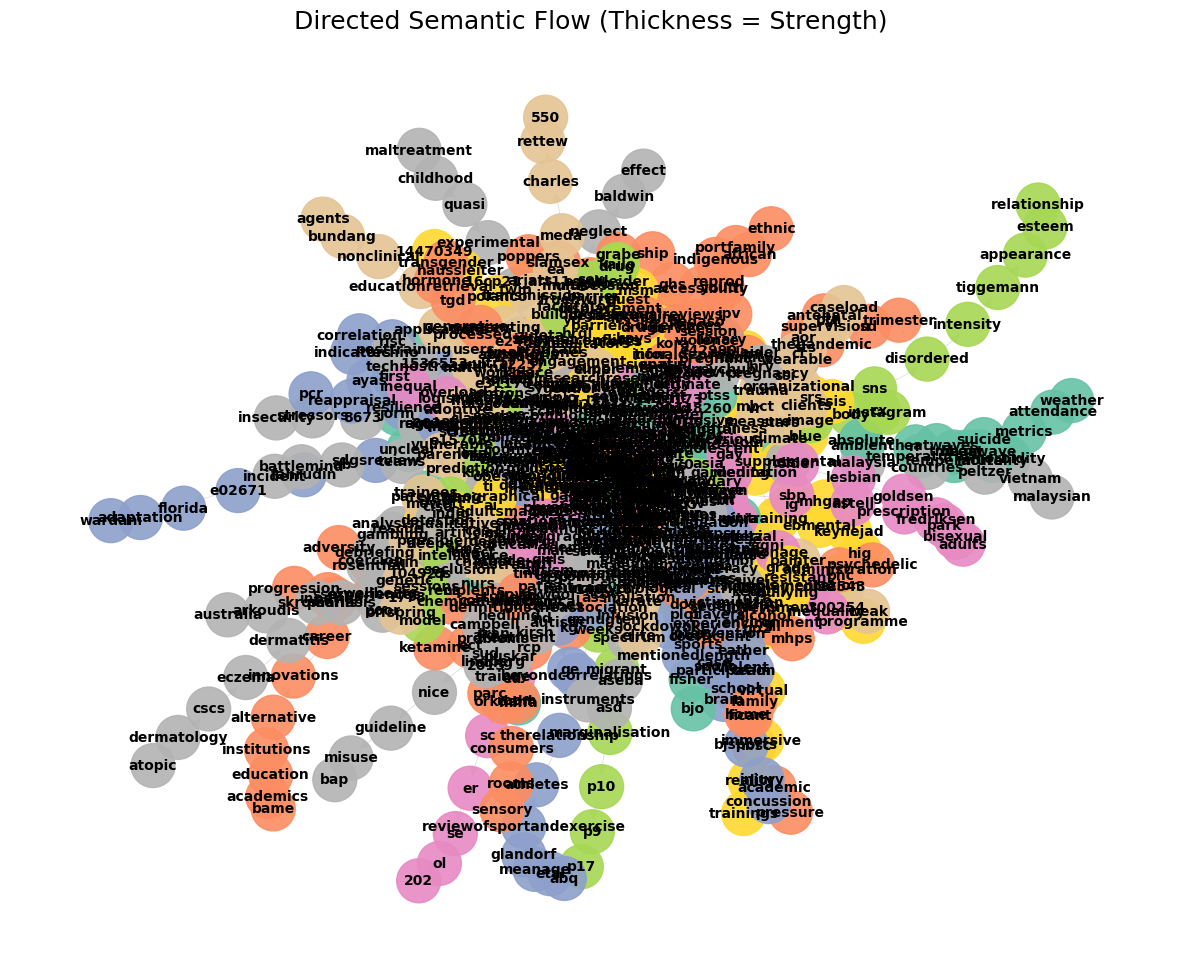

In [10]:
# ==============================================================================
# PART 3: DIRECTED & WEIGHTED GRAPH (Upgrade)
# ==============================================================================
print("\nStep 3: Building Directed & Weighted Network...")

# 1. Initialize DIRECTED Graph
G = nx.DiGraph()

# 2. Build Edges based on "Flow"
# We assume the order of keywords matters (1st keyword -> 2nd keyword)
# This creates a "Hierarchy" of concepts in your visual.
for fname, words in doc_keywords.items():
    if len(words) < 2: continue
    
    for i in range(len(words) - 1):
        w1 = words[i]
        w2 = words[i+1] # Link to the NEXT word in the list
        
        if w1 == w2: continue
        
        if G.has_edge(w1, w2):
            G[w1][w2]['weight'] += 1
        else:
            G.add_edge(w1, w2, weight=1)

print(f"  - Nodes: {G.number_of_nodes()}")
print(f"  - Edges: {G.number_of_edges()}")

# 3. Detect Communities (Must convert to Undirected for Louvain algorithm)
partition = community_louvain.best_partition(G.to_undirected())
nx.set_node_attributes(G, partition, 'cluster')

# 4. GLOBAL VISUALIZATION (With Curves & Arrows)
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, k=0.3, seed=42)

# Get weights for line thickness
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
# Normalize thickness (so huge weights don't cover the screen)
width_map = [float(w) * 0.5 for w in weights]

# Draw Nodes
node_colors = [partition[n] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors, cmap=plt.cm.Set2, alpha=0.9)

# Draw Edges (Curved Arcs with Arrows)
nx.draw_networkx_edges(G, pos, 
                       width=width_map, 
                       arrows=True, 
                       arrowstyle='-|>', 
                       arrowsize=15, 
                       edge_color='grey', 
                       alpha=0.3, 
                       connectionstyle='arc3, rad = 0.1') # This makes them CURVED

# Draw Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Directed Semantic Flow (Thickness = Strength)", fontsize=18)
plt.axis('off')
plt.show()


Step 5: Visualizing Weighted Sub-Universes...


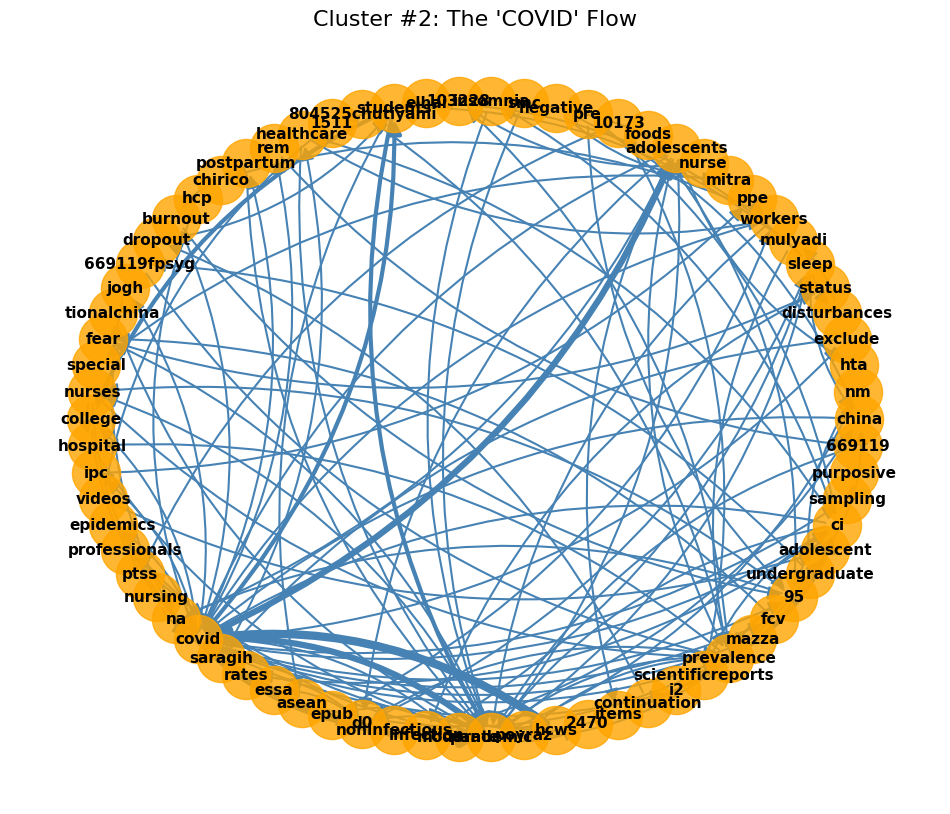

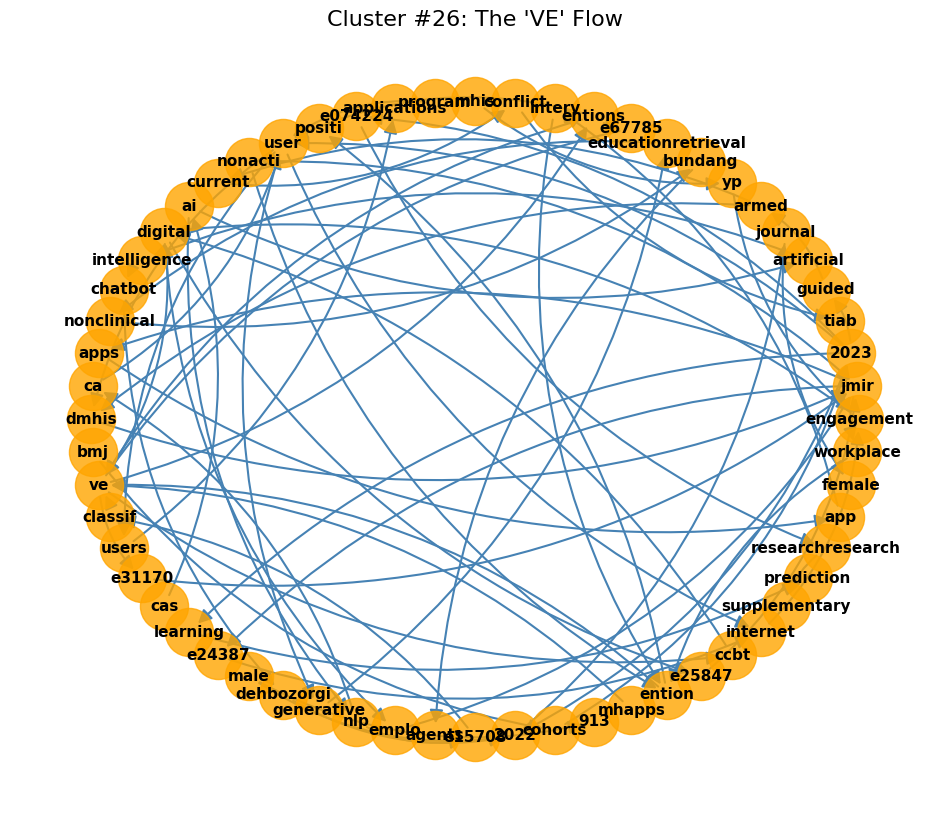

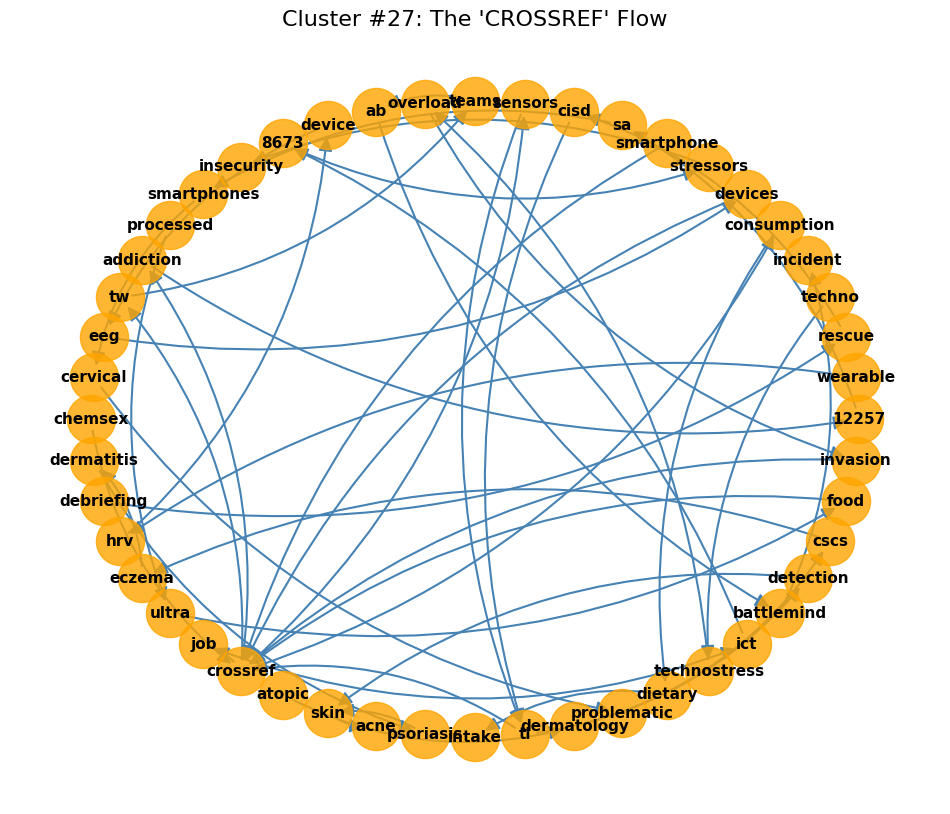

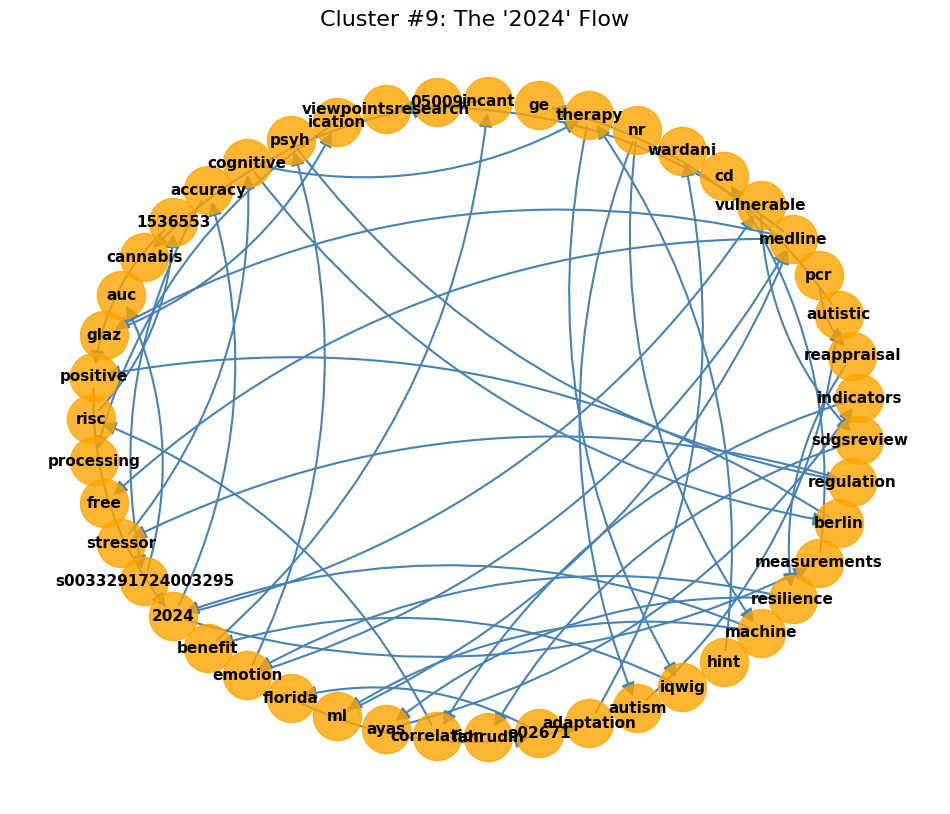

In [11]:
# ==============================================================================
# PART 5: WEIGHTED SUB-CLUSTER ANALYSIS (Python)
# ==============================================================================
print("\nStep 5: Visualizing Weighted Sub-Universes...")

from collections import Counter
cluster_counts = Counter(partition.values())
top_5_clusters = [cid for cid, count in cluster_counts.most_common(4)]

for i, cluster_id in enumerate(top_5_clusters):
    # Filter Nodes
    nodes_in_cluster = [node for node, cid in partition.items() if cid == cluster_id]
    subG = G.subgraph(nodes_in_cluster)
    if len(subG.nodes()) < 3: continue

    # Calculate Leader
    degrees = dict(subG.degree())
    local_leader = max(degrees, key=degrees.get)

    # VISUALIZE
    plt.figure(figsize=(12, 10))
    # Use Shell layout for a cleaner "Flow" look in clusters
    try:
        pos_sub = nx.shell_layout(subG) 
    except:
        pos_sub = nx.spring_layout(subG)

    # Weights for this cluster
    sub_weights = [subG[u][v]['weight'] for u, v in subG.edges()]
    sub_width = [float(w) * 1.5 for w in sub_weights] # Make lines thicker here

    # Draw
    nx.draw_networkx_nodes(subG, pos_sub, node_size=1200, node_color='orange', alpha=0.8)
    
    nx.draw_networkx_edges(subG, pos_sub, 
                           width=sub_width, 
                           arrows=True, 
                           arrowsize=20, 
                           edge_color='steelblue', 
                           connectionstyle='arc3, rad = 0.2') # Strong curve
    
    nx.draw_networkx_labels(subG, pos_sub, font_size=11, font_weight="bold")

    plt.title(f"Cluster #{cluster_id}: The '{local_leader.upper()}' Flow", fontsize=16)
    plt.axis('off')
    plt.show()